# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Loading data set

In [40]:
df_fi = pd.read_csv(r"C:\Users\KEY6\bank\skw_coret_cln_bank.csv",sep = ',')

In [63]:
df_fi.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.834118,0.031094,0.978440,0.017617,0.741344,0.875099,0.322983,0.011637,0.013458,0.750816,...,0.995314,0.756469,0.009528,0.088799,0.003655,0.013877,0.016297,0.012654,0.277543,0
1,0.830318,0.035191,0.978221,0.016544,0.741265,0.873559,0.322530,0.011069,0.011092,0.750745,...,0.995311,0.755852,0.009532,0.088799,0.002015,0.009195,0.017675,0.008230,0.277490,0
2,0.835345,0.024954,0.980172,0.025679,0.741636,0.873560,0.323122,0.014547,0.015327,0.751664,...,0.995322,0.756308,0.009482,0.088799,0.002602,0.010925,0.015979,0.015947,0.278090,0
3,0.834666,0.037560,0.977635,0.014879,0.741095,0.873560,0.323050,0.010558,0.014099,0.750486,...,0.995352,0.756829,0.009456,0.088912,0.002859,0.013745,0.016553,0.011177,0.277513,0
4,0.831538,0.028123,0.978924,0.019947,0.741467,0.874206,0.322672,0.012643,0.013307,0.751112,...,0.995307,0.755990,0.009555,0.088799,0.002985,0.012217,0.016158,0.013799,0.277552,0


In [41]:
df_fi.shapedf_fi.shape

(10083, 65)

# Assigning data features to X ,and Target class to y

In [42]:

x = df_fi.iloc[:,0:64]

x.shape

y = df_fi.iloc[:,64]

y.value_counts()


0    9685
1     398
Name: class, dtype: int64

# Train Test split

In [43]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40, random_state=42)


In [44]:
print("After spliting, counts of label '1' in TRAIN data: {} ".format(y_train[y_train==1].shape[0]))
print("After spliting, counts of label '0' in TRAIN data: {}".format(y_train[y_train==0].shape[0]))

After spliting, counts of label '1' in TRAIN data: 239 
After spliting, counts of label '0' in TRAIN data: 5810


In [45]:
print("After spliting, counts of label '1' in TEST data: {} ".format(y_test[y_test==1].shape[0]))
print("After spliting, counts of label '0' in TEST data: {}".format(y_test[y_test==0].shape[0]))

After spliting, counts of label '1' in TEST data: 159 
After spliting, counts of label '0' in TEST data: 3875


# logistic regression model classifying

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model_lr = LogisticRegression()

In [48]:
model_lr.fit(x_train,y_train)

C:\Users\KEY6\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Confusion matrix and classification report

In [49]:
y_predicted=model_lr.predict(x_test)

print(classification_report(y_test, y_predicted))

cm=confusion_matrix(y_test, y_predicted)
print(cm)
print(accuracy_score(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3875
           1       0.00      0.00      0.00       159

    accuracy                           0.96      4034
   macro avg       0.48      0.50      0.49      4034
weighted avg       0.92      0.96      0.94      4034

[[3875    0]
 [ 159    0]]
0.9605850272682201


C:\Users\KEY6\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# AUC ROC curve

In [50]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_lr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

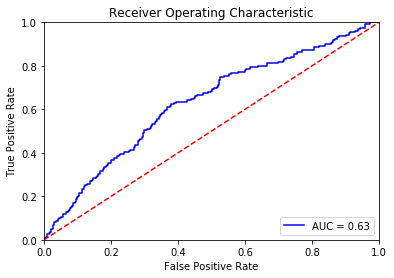

In [51]:

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# auc value

In [52]:
print("AUC value",roc_auc)

AUC value 0.6302195171434368


In [53]:
gini = (2*roc_auc)-1

In [54]:
print("gini score = ",gini)

gini score =  0.26043903428687365


In [55]:
confi_lvl = model_lr.predict_proba(x)

In [56]:
confi_lvl = pd.DataFrame(confi_lvl)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B2D35EDFD0>,
      dtype=object)

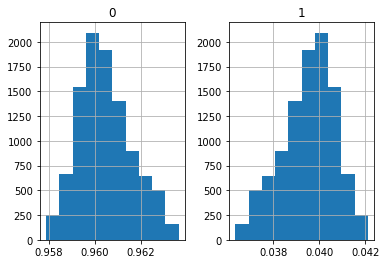

In [57]:
confi_lvl.hist()

In [65]:
feature_importance = abs(model_lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [60]:
feature_importance

array([ 43.44240531,  95.91879059,  30.42406303,  68.49992285,
        17.61965509,  21.77373437,   9.02549063,  33.66986175,
         6.67835205,  23.49513654,   8.91350272,  12.70980023,
         6.82272502,   9.02625978,   3.11743871,  13.15213229,
        37.80664361,   9.02930517,   6.80976557,  18.01019836,
        14.92509629,   8.32171271,   6.79700407,  13.18638584,
        27.31617828,  12.54014287,   2.20788741,  10.60238427,
        10.60045128,   1.19666826,   6.81927278,   4.05692493,
        15.75359341,   5.53045363,   9.13271953,   7.80206978,
         4.05430509,  23.81228697,  19.80724414,   9.35043984,
        14.04790362,  18.22281796,   3.03463068,   3.21506669,
         3.03188318,  30.35295043,   1.05473366,   8.35336986,
        19.32397512,  28.81508934, 100.        ,   3.1838701 ,
         4.06117116,   4.04453299,  18.44230094,  19.0960572 ,
        17.77311953,   0.59502121,   1.50604167,   2.99570168,
         2.57617291,   5.19028442,  54.22235521,   4.86

In [66]:
feature_importance.shape

(64,)

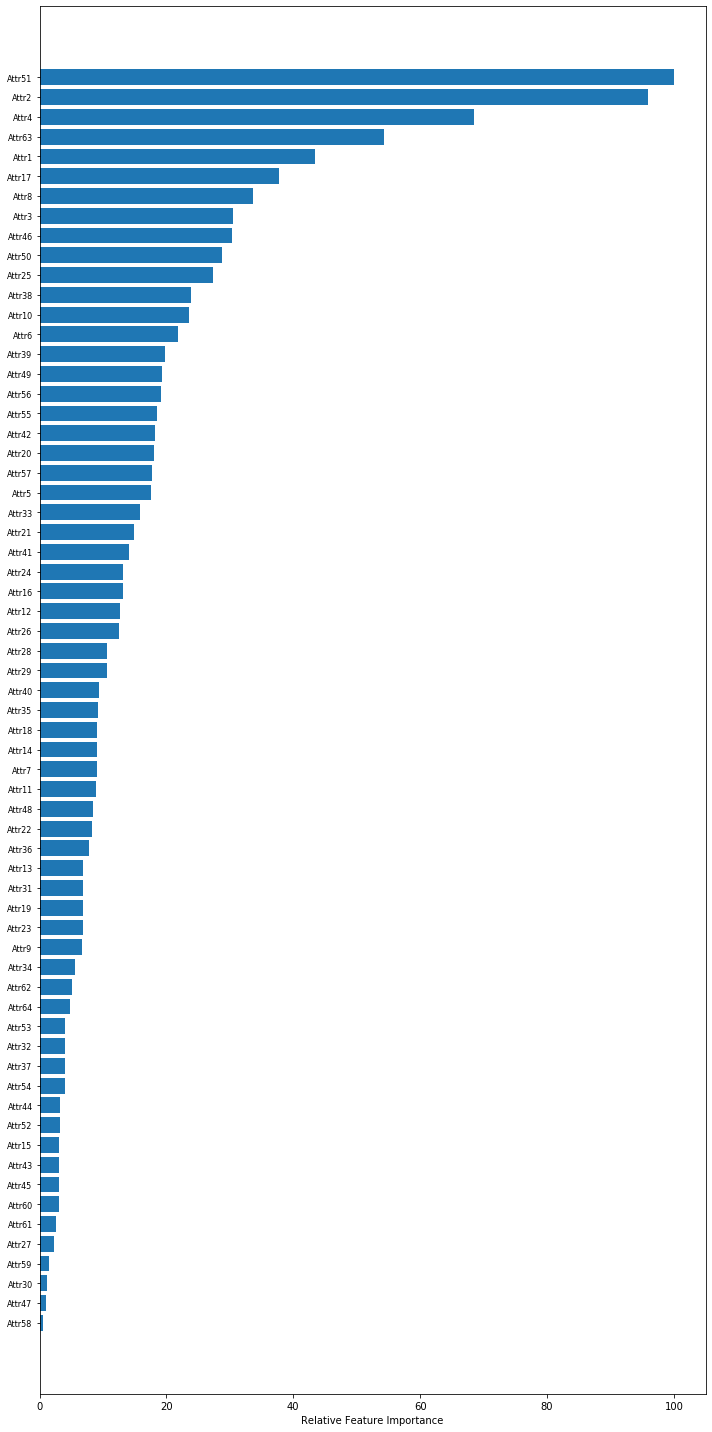

In [62]:
featfig = plt.figure(figsize=(10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#

In [64]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_predicted)

0.0